In [6]:
import math
import yfinance as yf
import pandas as pd
import numpy as np
path = "finviz.csv"

def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]


tickers = get_column_from_csv(path, "Ticker")
tickers = tickers.tolist()
print("len: ", len(tickers))
print(tickers[0])

len:  3157
A


In [19]:
# Get intraday data for today for each ticker
intradayData = yf.download(tickers, period="1d", interval="5m")
intradayData = intradayData["Adj Close"].fillna(method="ffill")

# get data where the interval is 1 month
monthData = yf.download(tickers, period="1mo", interval="1d")


[*********************100%***********************]  3391 of 3391 completed

36 Failed downloads:
- MOG/A: No data found for this date range, symbol may be delisted
- EBR/B: No data found for this date range, symbol may be delisted
- CEA: No data found for this date range, symbol may be delisted
- RFP: No data found for this date range, symbol may be delisted
- CIG/C: No data found for this date range, symbol may be delisted
- GEF/B: No data found for this date range, symbol may be delisted
- BRK/A: No data found for this date range, symbol may be delisted
- SPLP: No data found for this date range, symbol may be delisted
- BML/PL: No data found for this date range, symbol may be delisted
- C/PK: No data found for this date range, symbol may be delisted
- MKC/V: No data found for this date range, symbol may be delisted
- UMPQ: No data found for this date range, symbol may be delisted
- COWN: No data found for this date range, symbol may be delisted
- ESBA: No data found for this date ran

In [20]:
intradayData.tail()

A         AA        AAL      AAN  \
2023-03-02 15:05:00-05:00  140.789993  53.099998  16.040001  12.2999   
2023-03-02 15:10:00-05:00  140.955002  53.134998  16.075001  12.3843   
2023-03-02 15:15:00-05:00  140.904999  53.139999  16.065001  12.3150   
2023-03-02 15:20:00-05:00  140.904999  53.165001  16.070000  12.2950   
2023-03-02 15:25:00-05:00  140.904999  53.165001  16.070000  12.3000   

                                AAON         AAP        AAPL        AAT  \
2023-03-02 15:05:00-05:00  91.099998  138.634995  145.815002  24.805000   
2023-03-02 15:10:00-05:00  91.440002  138.420303  145.985001  24.850000   
2023-03-02 15:15:00-05:00  91.349998  138.429993  145.985001  24.809999   
2023-03-02 15:20:00-05:00  91.540001  138.524002  146.210007  24.809999   
2023-03-02 15:25:00-05:00  91.540001  138.524002  146.210007  24.809999   

                                 AAWW         AB  ...  ZNH       ZNTL  \
2023-03-02 15:05:00-05:00  100.430000  37.980000  ...  NaN  19.110001   
2023-03-02 15:10:00-05:00  100.430000  37.980000  ...  NaN  19.080000   
2023-03-02 15:15:00-05:00  100.389999  37.980000  ...  NaN  19.110001   
2023-03-02 15:20:00-05:00  100.379997  38.029999  ...  NaN  19.100000   
2023-03-02 15:25:00-05:00  100.379997  38.029999  ...  NaN  19.100000   

                                   ZS        ZTO         ZTS       ZUMZ  \
2023-03-02 15:05:00-05:00  134.419998  24.170000  168.619995  23.290001   
2023-03-02 15:10:00-05:00  134.279999  24.250000  168.669998  23.290001   
2023-03-02 15:15:00-05:00  133.830002  24.230000  168.544998  23.290001   
2023-03-02 15:20:00-05:00  133.970001  24.190001  168.800003  23.240000   
2023-03-02 15:25:00-05:00  133.970001  24.190001  168.800003  23.240000   

                             ZUO        ZWS  ZYME    ZYXI  
2023-03-02 15:05:00-05:00  9.445  22.959999  8.00  12.634  
2023-03-02 15:10:00-05:00  9.465  22.985001  8.00  12.640  
2023-03-02 15:15:00-05:00  9.475  22.995001  8.00  12.650  
2023-03-02 15:20:00-05:00  9.445  23.004999  8.01  12.640  
2023-03-02 15:25:00-05:00  9.445  23.004999  8.01  12.640  

[5 rows x 3391 columns]

In [26]:
dailyCloses = pd.read_csv("latestClose.csv")
dailyCloses = dailyCloses.drop(columns=["Date"])
dailyCloses = dailyCloses[-63::]
tickers = dailyCloses.columns.tolist()

In [23]:
dailyCloses.tail()

A         AA        AAL    AAN       AAON         AAP  \
791  143.199997  47.959999  15.870000  14.15  80.370003  142.009995   
792  141.199997  46.450001  15.560000  14.13  81.470001  138.850006   
793  142.179993  48.040001  15.630000  14.28  81.489998  140.630005   
794  141.970001  48.939999  15.980000  14.35  90.959999  144.960007   
795  137.509995  51.650002  16.030001  14.40  90.570000  138.820007   

           AAPL        AAT        AAWW         AB  ...        ZNH       ZNTL  \
791  149.399994  25.809999  101.779999  39.529999  ...  34.099998  19.219999   
792  146.710007        NaN         NaN        NaN  ...  33.939999  18.660000   
793  147.919998  25.450001  101.360001  38.669998  ...  35.139999  18.750000   
794  147.410004  25.230000  100.809998  38.840000  ...  36.009998  18.930000   
795  145.309998  25.090000  100.650002  38.939999  ...  36.090000  18.870001   

             ZS        ZTO         ZTS       ZUMZ   ZUO        ZWS  ZYME  \
791  133.500000  24.740000  169.500000  24.580000  8.84  23.110001  8.63   
792  130.880005  24.450001  166.330002  23.700001  8.62  22.969999   NaN   
793  131.839996  24.200001  165.470001  23.200001  8.56  23.010000  8.38   
794  131.149994  24.059999  167.000000  23.260000  8.47  23.000000  8.22   
795  128.440002  24.299999  167.570007  23.209999  8.20  22.400000  8.01   

      ZYXI  
791  12.63  
792    NaN  
793  12.83  
794  12.92  
795  12.85  

[5 rows x 3390 columns]

In [ ]:
intradayData.to_csv("intradayData.csv")

In [24]:
#get the highest price for each ticker
highs = dailyCloses.max()
highs.tail()

ZUMZ    28.200001
ZUO      9.190000
ZWS     24.959999
ZYME    10.040000
ZYXI    16.799999
dtype: float64

In [29]:
# Count the number of tickers where the intraday high is greater than the daily high 
counts = []
for i in range(intradayData.shape[0]):
    count = 0
    for ticker in tickers:
        if intradayData[ticker][i] > highs[ticker]:
            count += 1
    counts.append(count)



A 0
AA 0
AAL 0
AAN 0
AAON 0
AAP 0
AAPL 0
AAT 0
AAWW 0
AB 0
ABB 0
ABBV 0
ABC 0
ABCB 0
ABCL 0
ABCM 0
ABEV 0
ABG 0
ABM 0
ABNB 0
ABR 0
ABST 0
ABT 0
ABUS 0
AC 0
ACA 0
ACAD 0
ACCD 0
ACCO 0
ACDC 0
ACEL 0
ACET 0
ACGL 0
ACHC 0
ACI 0
ACIW 0
ACLS 0
ACLX 0
ACM 0
ACMR 0
ACN 0
ACNB 0
ACRE 0
ACRS 0
ACRV 0
ACT 0
ACVA 0
ADBE 0
ADC 0
ADEA 0
ADI 0
ADM 0
ADMA 0
ADNT 0
ADP 0
ADPT 0
ADSK 0
ADT 0
ADTN 0
ADUS 0
ADV 0
AEE 0
AEG 0
AEHR 0
AEIS 0
AEL 0
AEM 0
AEO 0
AEP 0
AER 0
AES 0
AEVA 0
AFCG 0
AFG 0
AFL 0
AFRI 0
AFRM 0
AFYA 0
AG 0
AGCO 0
AGEN 0
AGI 0
AGIO 0
AGL 0
AGM 0
AGNC 0
AGO 0
AGR 0
AGRO 0
AGTI 0
AGX 0
AGYS 0
AHCO 0
AHH 0
AI 0
AIG 0
AIMC 0
AIN 0
AIR 0
AIRC 0
AIRS 0
AIT 0
AIV 0
AIZ 0
AJG 0
AJRD 0
AKAM 0
AKO/A 0
AKO/B 0
AKR 0
AKRO 0
AKYA 0
AL 0
ALB 0
ALBO 0
ALC 0
ALDX 0
ALE 0
ALEC 0
ALEX 0
ALG 0
ALGM 0
ALGN 0
ALGT 0
ALHC 0
ALK 0
ALKS 0
ALKT 0
ALL 0
ALL/PB 0
ALLE 0
ALLG 0
ALLK 0
ALLO 0
ALLY 0
ALNY 0
ALPN 0
ALRM 0
ALRS 0
ALSN 0
ALT 0
ALTG 0
ALTR 0
ALV 0
ALVR 0
ALX 0
AM 0
AMAL 0
AMAT 0
AMBA 0
AMBC 0
AMBP 0
AMC 

[55, 52, 56, 59, 81, 91, 119, 116, 109, 88, 81, 105, 122, 110, 116, 116, 132, 131, 127, 139, 141, 147, 140, 135, 140, 141, 147, 147, 143, 148, 148, 151, 149, 139, 147, 155, 161, 158, 159, 158, 166, 167, 171, 162, 165, 163, 158, 156, 160, 179, 176, 177, 184, 194, 203, 201, 192, 200, 204, 212, 209, 200, 203, 205, 200, 205, 204, 204, 207, 205, 212, 212]


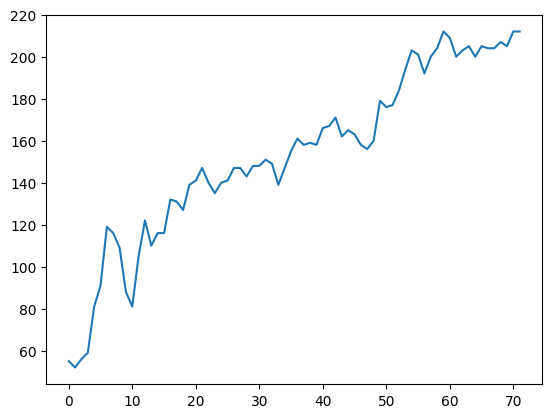

In [30]:
print(counts)
import matplotlib.pyplot as plt
ys = counts
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()

plt.close()
